In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import ppscore as pps
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# DATA CLEANING

In [2]:
data = pd.read_csv('D:/Project/bankruptcy-prevention1.csv')
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [3]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [4]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.shape #250 rows and 7 columns

(250, 7)

In [6]:
data.info()#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [7]:
data['class']=data['class'].astype('category')#converted data type from object to category

In [8]:
data.dtypes

industrial_risk           float64
management_risk           float64
financial_flexibility     float64
credibility               float64
competitiveness           float64
operating_risk            float64
class                    category
dtype: object

In [9]:
data[data.duplicated()] #the dataset can have relevant information
                        #that's why the duplicate values shouldn't be omitted

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [10]:
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:,-1])
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [11]:
data['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

([<matplotlib.patches.Wedge at 0x2fcfe75ec10>,
 [Text(-0.24669792697222737, 1.0719795393698546, 'Not bankrupt'),
  Text(0.24669802733819424, -1.0719795162723231, 'Bankrupt')])

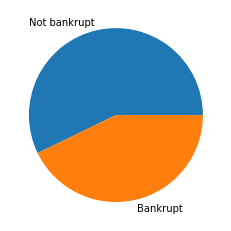

In [12]:
plt.pie(data['class'].value_counts(),labels = ['Not bankrupt','Bankrupt'])

<AxesSubplot:>

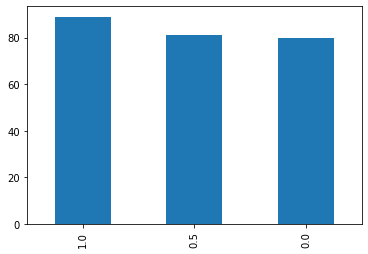

In [13]:
data['industrial_risk'].value_counts().plot(kind = 'bar')

(array([ 62.,   0.,   0.,   0.,   0.,  69.,   0.,   0.,   0., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

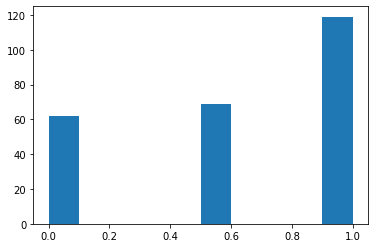

In [14]:
plt.hist(data['management_risk'],bins = 10)

(array([103.,   0.,   0.,   0.,   0.,  56.,   0.,   0.,   0.,  91.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

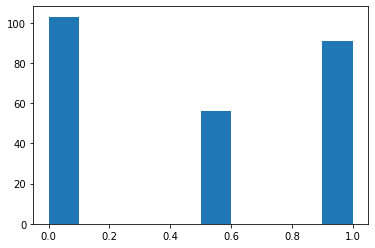

In [15]:
plt.hist(data['competitiveness'],bins = 10)

# FEATURE ENGINEERING

In [16]:
correlation = data.corr(method = 'pearson')
correlation

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<AxesSubplot:>

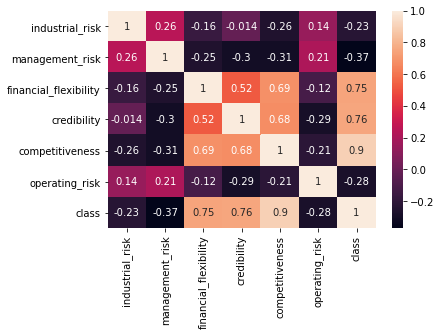

In [17]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)   

In [18]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
1,industrial_risk,management_risk,0.108761,regression,True,mean absolute error,0.362,0.322629,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.000000,regression,True,mean absolute error,0.352,0.352440,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346,0.361087,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.015113,regression,True,mean absolute error,0.388,0.382136,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000000,regression,True,mean absolute error,0.386,0.387298,DecisionTreeRegressor()
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.428,0.463702,DecisionTreeRegressor()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338,0.348953,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000,1.000000,None
9,management_risk,financial_flexibility,0.042517,regression,True,mean absolute error,0.352,0.337034,DecisionTreeRegressor()


In [19]:
array = data.values
X = array[:,:-1]
Y = array[:,-1]
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

In [20]:
set_printoptions(suppress = True)
print(fit.scores_)
features = fit.transform(X)

[ 4.22529844  9.40719007 60.23724218 52.30725081 82.1862519   6.4581291 ]


In [21]:
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [22]:
fit.ranking_

array([3, 2, 1, 1, 1, 4])

In [23]:
feature_scores = { 'Features' : pd.Series(['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness','operating_risk'],
                       index =['0', '1', '2', '3','4','5']),
      'Correlation' : pd.Series([-0.2278, -0.3708, 0.7510, 0.7559, 0.8994,0.2797],
                        index =['0', '1', '2', '3','4','5']),
      'chi2_score' : pd.Series([4.2252, 9.4071, 60.2372, 52.3072, 82.1862, 6.4581],
                        index =['0', '1', '2', '3','4','5']),
      'RFE ranking' : pd.Series([3, 2, 1, 1, 1, 4],
                        index =['0', '1', '2', '3','4','5']),
    }

In [24]:
df = pd.DataFrame(feature_scores)
df

,Features,Correlation,chi2_score,RFE ranking
0,industrial_risk,-0.2278,4.2252,3
1,management_risk,-0.3708,9.4071,2
2,financial_flexibility,0.7510,60.2372,1
3,credibility,0.7559,52.3072,1
4,competitiveness,0.8994,82.1862,1
5,operating_risk,0.2797,6.4581,4


In [25]:
new_data = data.drop(['industrial_risk','management_risk','operating_risk'],axis = 1)

In [26]:
new_data.head()

,financial_flexibility,credibility,competitiveness,class
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.5,0.0,0
4,0.0,0.0,0.0,0


# MODEL VALIDATION

In [27]:
x = new_data.iloc[:,:-1].values
y = new_data.iloc[:,-1].values

In [28]:
#evaluate using train test split 

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3,random_state= 7)

log_model = LogisticRegression(max_iter=500,random_state = 7)
log_model.fit(X_train, Y_train)


result = log_model.score(X_test, Y_test)

result*100.0

100.0

In [29]:
#evaluate using Cross Validation

kfold = KFold(n_splits = 10)
model = LogisticRegression(max_iter=500,random_state = 7)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

print(results.mean()*100.0)
print(results.std()*100.0)

99.60000000000001
1.2000000000000008


# MODEL BUILDING

In [30]:
X = new_data.iloc[:,:-1].values
Y = new_data.iloc[:,-1].values

# Logistic Regression

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500,random_state = 7)
log_model.fit(X,Y)

log_pred = log_model.predict(X)

confusion_matrix = confusion_matrix(Y,log_pred)
print(confusion_matrix)


[[106   1]
 [  0 143]]


In [32]:
log_result = ((107+143)/(107+0+0+143))*100
log_result

100.0

In [33]:
log_model.fit(X_train, Y_train)

log_result_train = np.round(log_model.score(X_train,Y_train),4)*100
log_result_test  = np.round(log_model.score(X_test, Y_test),4)*100

print(log_result_train)
print(log_result_test)

99.42999999999999
100.0


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt_model = DecisionTreeClassifier(criterion='gini',random_state = 7)
dt_model.fit(X,Y)

y_pred = dt_model.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)



[[107   0]
 [  0 143]]


In [35]:
dt_result = ((107+143)/(107+0+0+143))*100
dt_result

100.0

In [36]:
dt_model = DecisionTreeClassifier(criterion='gini',random_state = 7)
dt_model.fit(X_train,Y_train)

dt_result_train = np.round(dt_model.score(X_train,Y_train),4)*100
dt_result_test  = np.round(dt_model.score(X_test,Y_test),4)*100

print(dt_result_train)
print(dt_result_test)

100.0
98.67


# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

nb_model = GaussianNB()
nb_model.fit(X,Y)

y_pred = nb_model.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[102   5]
 [  0 143]]


In [38]:
nb_result = ((102+143)/(102+5+0+143))*100
nb_result 

98.0

In [39]:
nb_model.fit(X_train,Y_train)

nb_result_train = np.round(nb_model.score(X_train,Y_train),4)*100
nb_result_test = np.round(nb_model.score(X_test,Y_test),4)*100

print(nb_result_train)
print(nb_result_test)

97.71
98.67


# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X,Y)

y_pred = knn_model.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[106   1]
 [  2 141]]


In [41]:
knn_result = ((106+141)/(106+1+2+141))*100
knn_result 

98.8

In [42]:
knn_model.fit(X_train,Y_train)

knn_result_train = np.round(knn_model.score(X_train,Y_train),4)*100
knn_result_test  = np.round(knn_model.score(X_test,Y_test),4)*100

print(knn_result_train)
print(knn_result_test)

99.42999999999999
98.67


# SVC

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc_model = SVC()
svc_model.fit(X,Y)

y_pred = knn_model.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)


[[106   1]
 [  1 142]]


In [44]:
svc_result = ((106+142)/(106+1+1+142))*100
svc_result 

99.2

In [45]:
svc_model.fit(X_train,Y_train)

svc_result_train = np.round(svc_model.score(X_train,Y_train),4)*100
svc_result_test  = np.round(svc_model.score(X_test,Y_test),4)*100

print(svc_result_train)
print(svc_result_train)

100.0
100.0


# AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

ada_model = AdaBoostClassifier(n_estimators = 3,random_state = 7)
ada_model.fit(X,Y)

y_pred = knn_model.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[106   1]
 [  1 142]]


In [47]:
ada_result = ((106+142)/(106+1+1+142))*100
ada_result 

99.2

In [48]:
ada_model.fit(X_train,Y_train)

ada_result_train = np.round(ada_model.score(X_train,Y_train),4)*100
ada_result_test  = np.round(ada_model.score(X_test,Y_test),4)*100

print(ada_result_train)
print(ada_result_test)

100.0
98.67


# Bagging

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cart = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_estimator=cart, n_estimators=10,random_state = 7)
bag_model.fit(X,Y)

y_pred = knn_model.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[106   1]
 [  1 142]]


In [50]:
bag_result = ((106+142)/(106+1+1+142))*100
bag_result 

99.2

In [51]:
bag_model.fit(X_train,Y_train)

bag_result_train = np.round(bag_model.score(X_train,Y_train),4)*100
bag_result_test  = np.round(bag_model.score(X_test,Y_test),4)*100

print(bag_result_train)
print(bag_result_test)

100.0
98.67


# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(n_estimators=10, max_features=1,random_state = 7)
rf_model.fit(X, Y)

y_pred = knn_model.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[106   1]
 [  1 142]]


In [53]:
rf_result = ((106+142)/(106+1+1+142))*100
rf_result 

99.2

In [54]:
rf_model.fit(X_train, Y_train)

rf_result_train = np.round(rf_model.score(X_train,Y_train),4)*100
rf_result_test  = np.round(rf_model.score(X_test,Y_test),4)*100

print(rf_result_train)
print(rf_result_test)

100.0
98.67


# Stacking

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

estimators = []
model1 = LogisticRegression(max_iter=500,random_state = 7)

estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()

estimators.append(('cart', model2))

model3 = SVC()

estimators.append(('svm', model3))

ensemble = VotingClassifier(estimators)
ensemble.fit(X,Y)

y_pred = ensemble.predict(X)

confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[107   0]
 [  0 143]]


In [56]:
ensemble_result = ((107+143)/(107+0+0+143))*100
ensemble_result 

100.0

In [57]:
ensemble.fit(X_train,Y_train)

ensemble_result_train = np.round(ensemble.score(X_train,Y_train),4)*100
ensemble_result_test  = np.round(ensemble.score(X_test,Y_test),4)*100

print(ensemble_result_train)
print(ensemble_result_test)

100.0
98.67


# MODEL COMPARISION

In [58]:
scores_dict = {
    "Model":['Logistic Regression','Decision Tree','Naive Bayes','KNN','SVC','AdaBoost',
             'Bagged Decision Tree','Random Forest','Voting Classifier'],
    
    "Training_accuracy"      : [log_result_train, dt_result_train, nb_result_train, knn_result_train, svc_result_train,
                                ada_result_train, bag_result_train, rf_result_train, ensemble_result_train], 
    
    "Testing_accuracy"       : [log_result_test, dt_result_test, nb_result_test, knn_result_test, svc_result_test, 
                                ada_result_test, bag_result_test, rf_result_test, ensemble_result_test],
    
    "Whole dataset accuracy" : [log_result, dt_result,nb_result ,knn_result , svc_result, 
                                ada_result, bag_result, rf_result, ensemble_result],
}

scores_df = pd.DataFrame(scores_dict)

scores_df

,Model,Training_accuracy,Testing_accuracy,Whole dataset accuracy
0,Logistic Regression,99.43,100.00,100.0
1,Decision Tree,100.00,98.67,100.0
2,Naive Bayes,97.71,98.67,98.0
3,KNN,99.43,98.67,98.8
4,SVC,100.00,98.67,99.2
5,AdaBoost,100.00,98.67,99.2
6,Bagged Decision Tree,100.00,98.67,99.2
7,Random Forest,100.00,98.67,99.2
8,Voting Classifier,100.00,98.67,100.0


In [59]:
plt.style.use('fivethirtyeight')

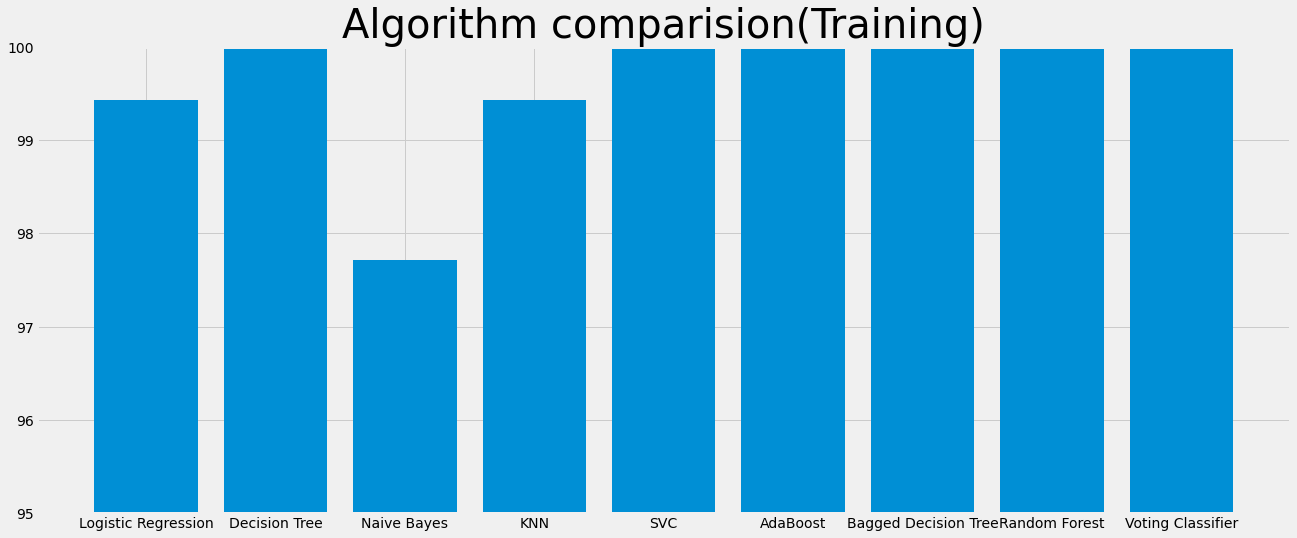

In [60]:
fig = plt.figure(figsize = (20,8))
plt.ylim(95,100)
plt.bar(scores_df.Model,scores_df.Training_accuracy)
plt.title('Algorithm comparision(Training)',fontsize = 40)
plt.show()

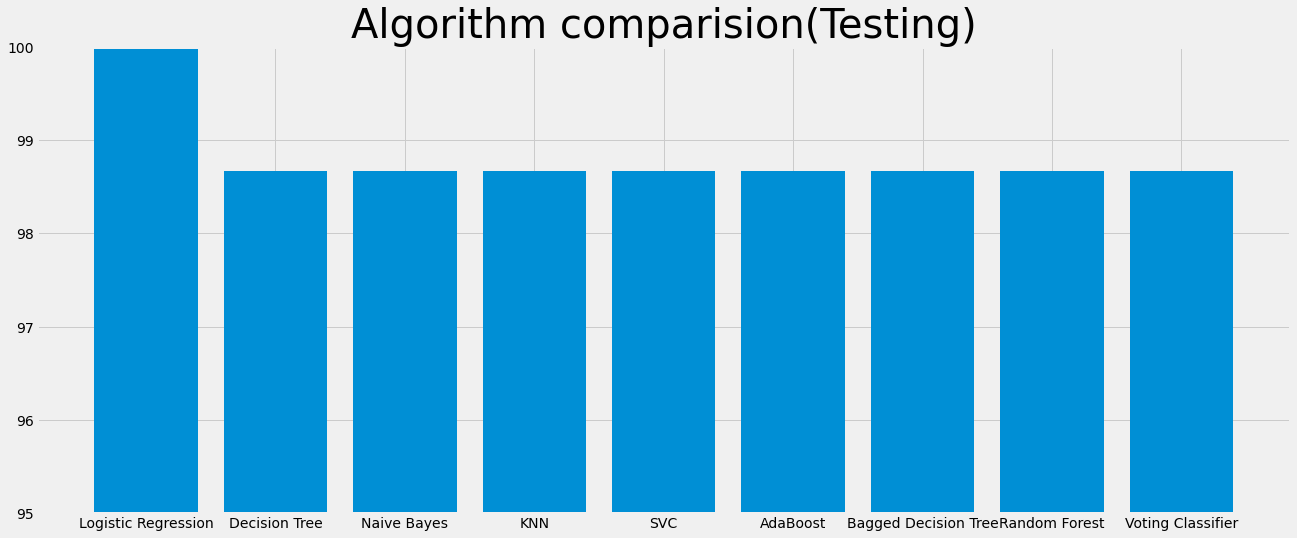

In [61]:
fig = plt.figure(figsize = (20,8))
plt.ylim(95,100)
plt.bar(scores_df.Model,scores_df.Testing_accuracy)
plt.title('Algorithm comparision(Testing)',fontsize = 40)
plt.show()

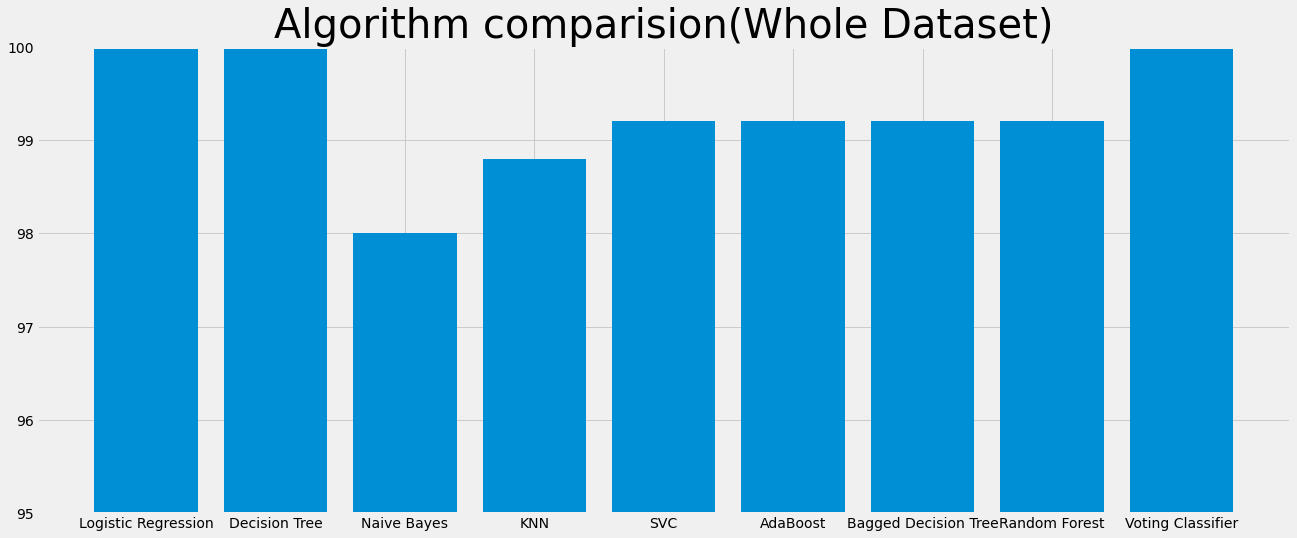

In [62]:
fig = plt.figure(figsize = (20,8))
plt.ylim(95,100)
plt.bar(scores_df.Model,scores_df['Whole dataset accuracy'])
plt.title('Algorithm comparision(Whole Dataset)',fontsize = 40)
plt.show()

# FINAL MODEL 

In [63]:
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(max_iter=500,random_state = 7)
final_model.fit(X_train,Y_train)

log_pred = final_model.predict(X_test)

In [64]:
print(classification_report(Y_test,log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



# FINAL MODEL PREDICTIONS(Given data)

In [65]:
actual = pd.Series(Y_test[:10])
actual

0    1
1    1
2    0
3    0
4    0
5    1
6    0
7    1
8    1
9    1
dtype: int32

In [66]:
predicted = log_pred[:10]
predicted

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [67]:
pred_df= pd.DataFrame({'actual': actual,
                         'predicted_prob': predicted})

pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


# FINAL MODEL PREDICTIONS(NEW DATA)

In [68]:
scores_dict = {
    "financial"   :[0.0,0.5,0.0,1.0,1.0,0.5,0.0],
    "Credible"    : [1.0,0.0,0.0,0.5,1.0,1.0,0.5], 
    "Competition" : [1.0,0.0,0.0,1.0,0.5,0.0,1.0]
}

scores_df = pd.DataFrame(scores_dict)

scores_df

,financial,Credible,Competition
0,0.0,1.0,1.0
1,0.5,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.5,1.0
4,1.0,1.0,0.5
5,0.5,1.0,0.0
6,0.0,0.5,1.0


In [69]:
pred_data = scores_df.iloc[:,:].values
pred_data

array([[0. , 1. , 1. ],
       [0.5, 0. , 0. ],
       [0. , 0. , 0. ],
       [1. , 0.5, 1. ],
       [1. , 1. , 0.5],
       [0.5, 1. , 0. ],
       [0. , 0.5, 1. ]])

In [70]:
scores_df['Outcome'] = final_model.predict(pred_data)
scores_df

,financial,Credible,Competition,Outcome
0,0.0,1.0,1.0,1
1,0.5,0.0,0.0,0
2,0.0,0.0,0.0,0
3,1.0,0.5,1.0,1
4,1.0,1.0,0.5,1
5,0.5,1.0,0.0,1
6,0.0,0.5,1.0,1
